In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from tqdm import tqdm

In [2]:
def mass_weigt_cluster(data_cluster):
    mass_w = []
    max_cluster = []
    for groups_raw in data_cluster: #tqdm(data_cluster,desc='Scanning clusters',total=len(data_cluster),leave=False):
        groups = [x.split(',') for x in groups_raw]
        size = np.array([len(group) for group in groups])
        mass_w.append(np.sum(size**2)/np.sum(size))
        max_cluster.append(size.max())
    return mass_w, max_cluster
def ave_beta(data_beta):
    cont = []
    for hang in data_beta:
        hang_no_1 = ''.join(hang.split('!'))
        cont.append(hang_no_1.count('E')/len(hang_no_1)*100)
    return cont

In [3]:
def max_cluster_and_beta(data_cluster,data_beta):
    max_cluster = []
    max_cluster_beta = []
    for i in range(len(data_cluster)):
        groups = [x.split(',') for x in data_cluster[i]]
        size = [len(x) for x in groups]
        largest_clusters = [x for x in groups if len(x)==max(size)]
        pep = data_beta[i].split('!')
        ave_betas = [np.array([pep[int(x)].count('E')/len(pep[int(x)])*100 for x in largest_cluster]).mean() for largest_cluster in largest_clusters]
        max_cluster_beta.append(max(ave_betas))
        max_cluster.append(max(size))
    return max_cluster, max_cluster_beta

In [4]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fontsize_title = 30
fontsize_label = 20
fontsize_tick = 25

In [ ]:
# path options: '16tauC11' 26&34, '16tauC10' 3&8,'16mutauC11'
path='16tauC11'
trj = 26
data_cluster = [line.strip('\n').split()[1:] for line in open(f'data_all/{path}-{trj}.cluster')][::100]
data_beta = [line.strip('\n').split()[1] for line in open(f'data_all/{path}-{trj}.dssp')][::100]
max_cluster, max_cluster_beta = max_cluster_and_beta(data_cluster,data_beta)

In [ ]:
time = np.arange(1,len(max_cluster)+1)*0.5
fig,axes = plt.subplots(figsize=(10,10),nrows=2,ncols=1)
axes[0].plot(time,max_cluster,color=colors[0],label='max cluster size')
axes[1].plot(time, max_cluster_beta,colors[1],label='beta sheet content')
axes[0].set_ylim(0,17)
axes[1].set_ylim(-5,100)
for i in range(2):
    for label in axes[i].get_xticklabels():
        label.set_family("Arial")
        label.set_size(fontsize_tick)
    for label in axes[i].get_yticklabels():
        label.set_family("Arial")
        label.set_size(fontsize_tick)

In [8]:
# path options: '16tauC11', '16tauC10','16mutauC11'
path='16tauC10'
MCs = []
betas = []
for trj in tqdm(range(1,51),desc='Processing each trajectory'):
    data_cluster = [line.strip('\n').split()[1:] for line in open(f'data_all/{path}-{trj}.cluster')][::100]
    data_beta = [line.strip('\n').split()[1] for line in open(f'data_all/{path}-{trj}.dssp')][::100]
    max_cluster, max_cluster_beta = max_cluster_and_beta(data_cluster,data_beta)
    MCs.append((np.array(max_cluster)))
    betas.append(np.array(max_cluster_beta))
del data_cluster; del data_beta; del max_cluster; del max_cluster_beta

Processing each trajectory: 100%|██████████| 50/50 [00:22<00:00,  2.25it/s]


Plotting: 100%|██████████| 50/50 [00:00<00:00, 117.25it/s]


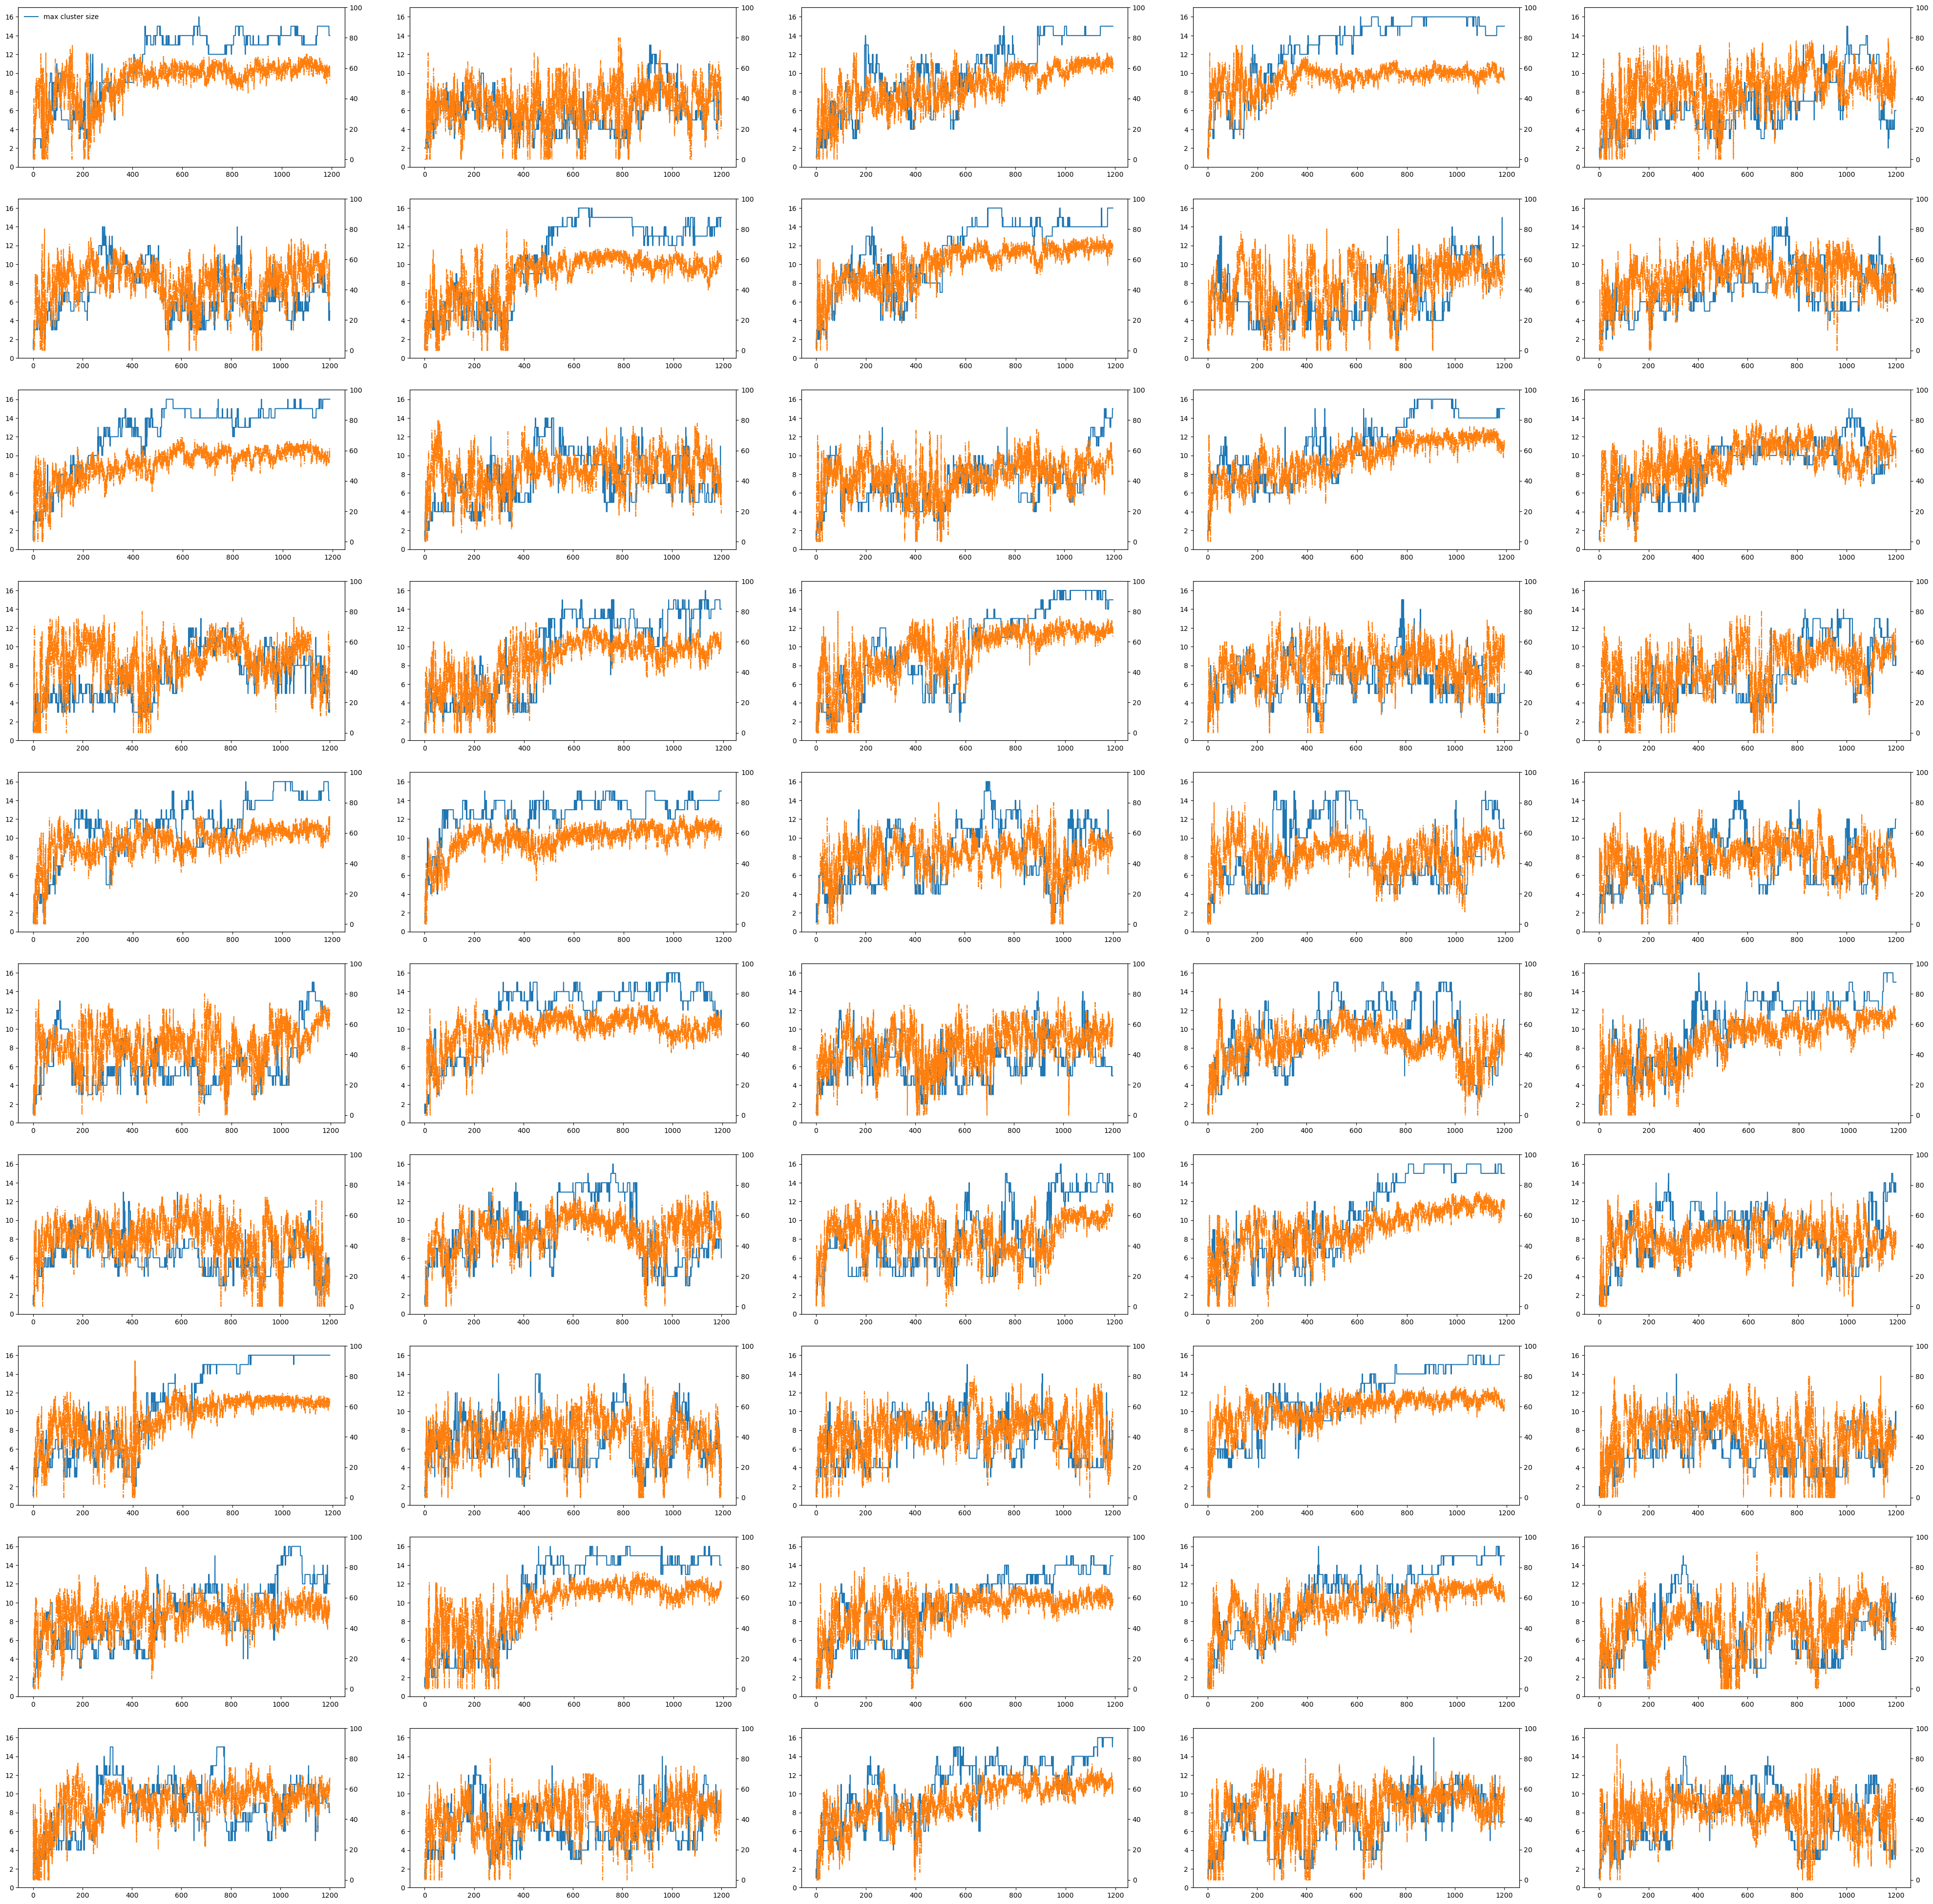

In [9]:
fig,axes = plt.subplots(figsize=(50,50),nrows=10,ncols=5)
axes = axes.flatten()
for ind,ax in tqdm(enumerate(axes),total=len(axes),desc='Plotting'):
    ax_beta = ax.twinx()
    time = np.arange(1,len(MCs[ind])+1)*0.5
    ax.plot(time,MCs[ind],color=colors[0],label='max cluster size')
    ax_beta.plot(time, betas[ind],colors[1],label='beta sheet content',linestyle='-.')
    ax.set_ylim(0,17)
    ax_beta.set_ylim(-5,100)
axes[0].legend(frameon=False, loc='upper left')
plt.savefig(f'{path}_cluster.svg')